In [2]:
import numpy as np

In [37]:
class Linear_Regression:

    def __init__(self, learning_rate, no_of_iteration):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration

    def fit (self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.no_of_iteration):
            self.update_weight()

    def update_weight(self):
        Y_prediction = self.predict(self.X)
        dw = -(2*( self.X.T ).dot(self.Y - Y_prediction))/self.m
        db = - 2 * np.sum(self.Y - Y_prediction)/self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [41]:
salary_data = pd.read_csv('salary_data.csv')

In [43]:
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [45]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [47]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [49]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state= 2)

In [77]:
model = Linear_Regression(learning_rate=0.02, no_of_iteration= 1000)

In [79]:
model.fit(X_train,Y_train)

In [81]:
print("weight = ", model.w[0])
print("bias = ", model.b)

weight =  9514.400999035135
bias =  23697.406507136307


In [83]:
test_data_prediction = model.predict(X_test)

In [85]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


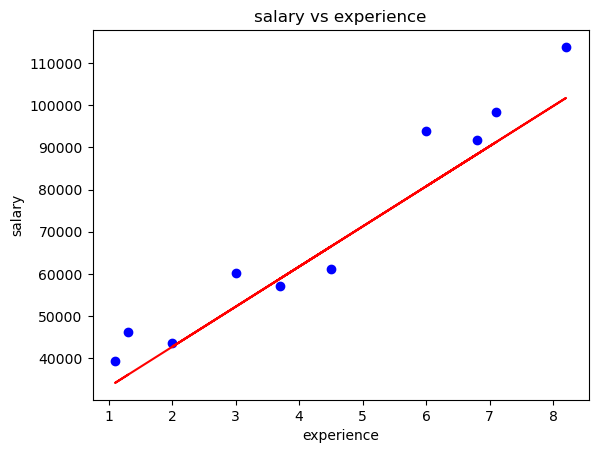

In [87]:
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, test_data_prediction, color = 'red')
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("salary vs experience")
plt.show()